<a href="https://colab.research.google.com/github/kimjunyeop1/project1/blob/main/202200932_%EA%B9%80%EC%A4%80%EC%97%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import os


fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
print(X_train.shape)

(60000, 28, 28)


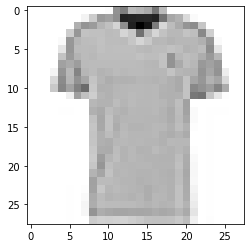

In [ ]:
plt.imshow(X_train[2437], cmap='Greys')
plt.show()

In [ ]:
import sys

for x in X_train[2437]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  6  13114896 10211115596 0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  24 78 12411813322522322122022416011310561 10 0  0  0  0  0  0  
0  0  0  0  0  0  10612912310292 69 13322725523615165 96 11012813685 0  0  0  0  0  
0  0  0  0  0  77 12789 92 92 97 95 68 84 16299 68 89 99 99 88 94 13975 0  0  0  0  
0  0  0  0  9  12610296 95 91 96 96 97 85 68 83 10099 1031001001001061269  0  0  0  
0  0  0  0  46 12798 97 98 92 95 94 94 94 98 99 96 96 91 95 10310196 13548 0  0  0  
0  0  0  0  88 12410397 99 95 95 95 95 95 91 95 95 89 13010094 98 1081251010  0  0  
0  0  0  0  11811112198 97 97 97 97 97 97 98 10010189 13011195 1001251181270  0  0  
0  0  0  22 12899 14310197 10310197 99 98 98 99 10010088 10110310412911413035 0  0  
0  0  0  65 13710213111487 10210810410510410110210310110611189 11512610411563 0  0  
0  0  0  83 14211714516782 10610510110099 99 10099 10410611188 1401311211431100  0  
0  0  0  0  0  32 11992 76 10210510010098 99 10099 10510610588 15

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[257]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,  activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


modelpath="./data/model/MNIST_CNN.hdf5"


checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))



Epoch 1: val_loss improved from inf to 0.37235, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.37235 to 0.31467, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.31467 to 0.28453, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.28453 to 0.27370, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.27370 to 0.26259, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.26259 to 0.23130, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.23130 to 0.22921, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.22921 to 0.22692, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.22692

Epoch 10: val_loss improved from 0.22692 to 0.21945, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 11: val_loss did not improve from 0.21945

Epoch 12: val_loss did not impro

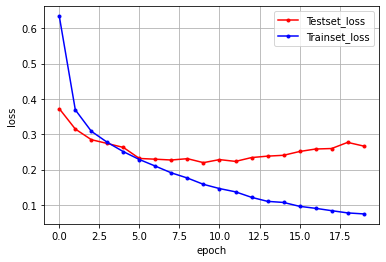

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()